In [50]:
!pip install mlflow
!pip install pyngrok

In [51]:
import mlflow
import mlflow.sklearn

In [64]:
from pyngrok import ngrok

# Kill all active tunnels
ngrok.kill()


In [68]:
import mlflow
import mlflow.sklearn

mlflow.set_experiment("Exp 1- RF Baseline")

from google.colab import userdata
ngRoktoken=userdata.get('ngroktoen')

get_ipython().system_raw('mlflow ui --port 2000 &')
mlflow.set_tracking_uri('http://localhost:2000')
from pyngrok import ngrok
ngrok.set_auth_token(ngRoktoken)

public_url=ngrok.connect(2000).public_url
print('mlflow ui url: ', public_url)

mlflow ui url:  https://d3aa-34-125-154-21.ngrok-free.app


In [69]:
import numpy as np
import pandas as pd

In [70]:
df=pd.read_csv('reddit.csv')

df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [71]:
df.dropna(inplace=True)

In [72]:
df.drop_duplicates(inplace=True)

In [73]:
df=df[~(df['clean_comment'].str.strip()=='')]

In [74]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [75]:
#ensure necessary NLTK data is download

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [76]:
#defining the preprocessing function

def preprocess_comment(comment):
  #convert to lower case
  comment=comment.lower()

  #remove trailing and leading whitespace
  comment=comment.strip()

  #remove newline character
  comment= re.sub(r'\n'," ",comment)

  #remove non-alphanumeric characters except punctuation
  comment=re.sub(r'[^A-Za-z0-9\s!?.,]','',comment)

  #remove stopwords but retain important ones for sentiment analysis
  stop_words=set(stopwords.words('english'))-{'not','but','however','yet'}
  comment= ' '.join([word for word in comment.split() if word not in stop_words])

  #lemmatize the words
  lemmatizer = WordNetLemmatizer()
  comment=' '.join([lemmatizer.lemmatize(word) for word in comment.split()])

  return comment




In [77]:
#applying the preprocessing function to the 'clean_comment' col
df['clean_comment']=df['clean_comment'].apply(preprocess_comment)

In [78]:
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


In [79]:
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_predict,StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
#step 1: Vectorize the comments using bag of words (countVectorizer)

vectorizer=CountVectorizer(max_features=5000) #bag of words with a limit of 5000 features

In [81]:
X=vectorizer.fit_transform(df['clean_comment']).toarray()
y=df['category'] #assuming 'sentiment' is the target variable (0 or 1 for binary classification)

In [82]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [83]:
X.shape

(36793, 5000)

In [84]:
y

,category
0,1
1,1
2,-1
3,0
4,1
...,...
37244,0
37245,1
37246,0
37247,1


In [85]:
y.shape

(36793,)

In [86]:
mlflow.set_experiment("RF Baseline")

2025/06/28 06:13:02 INFO mlflow.tracking.fluent: Experiment with name 'RF Baseline' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/734658059434494886', creation_time=1751091182634, experiment_id='734658059434494886', last_update_time=1751091182634, lifecycle_stage='active', name='RF Baseline', tags={}>

🏃 View run RandomForest_Baseline_TrainTestSplit at: http://localhost:2000/#/experiments/734658059434494886/runs/d5174245584043dd90c9b94434ba85f3
🧪 View experiment at: http://localhost:2000/#/experiments/734658059434494886
Accuracy: 0.6536214159532545


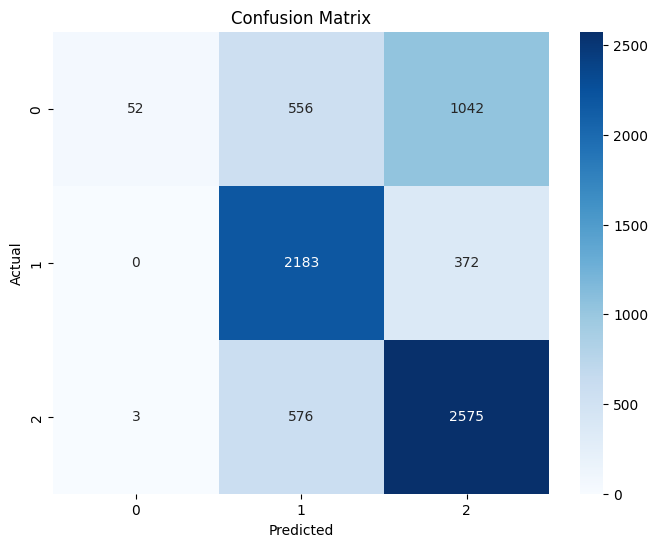

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from mlflow.models.signature import infer_signature
import mlflow.sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import mlflow
import os

# Step 1: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: MLflow run
with mlflow.start_run() as run:
    # Tags
    mlflow.set_tag("mlflow.runName", "RandomForest_Baseline_TrainTestSplit")
    mlflow.set_tag("experiment_type", "baseline")
    mlflow.set_tag("model_type", "RandomForestClassifier")
    mlflow.set_tag("description", "Baseline RandomForest model for sentiment analysis using Bag of Words (BoW) with a simple train-test split")

    # Log vectorizer parameters
    mlflow.log_param("vectorizer_type", "CountVectorizer")
    mlflow.log_param("vectorizer_max_features", vectorizer.max_features)

    # Model parameters
    n_estimators = 150
    max_depth = 15
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)

    # Train model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Predictions and accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)

    # Classification report
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in classification_rep.items():
        if isinstance(metrics, dict):
            for metric, value in metrics.items():
                mlflow.log_metric(f"{label}_{metric}", value)

    # Confusion matrix plot
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")

    # Save and log confusion matrix
    conf_path = "/content/confusion_matrix.png"
    plt.savefig(conf_path)
    mlflow.log_artifact(conf_path)

    # Infer input signature for reproducibility
    input_example = X_train[:5]
    signature = infer_signature(X_train, model.predict(X_train))

    # Log the model with name, signature, and input example
    mlflow.sklearn.log_model(
        sk_model=model,
        name="random_forest_model",
        input_example=input_example,
        signature=signature
    )

    # Save and log dataset
    data_path = "/content/dataset.csv"
    df.to_csv(data_path, index=False)
    mlflow.log_artifact(data_path)

print(f"Accuracy: {accuracy}")


In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.95      0.03      0.06      1650
           0       0.66      0.85      0.74      2555
           1       0.65      0.82      0.72      3154

    accuracy                           0.65      7359
   macro avg       0.75      0.57      0.51      7359
weighted avg       0.72      0.65      0.58      7359



In [89]:
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


In [90]:
df.to_csv('reddit_preprocessing.csv',index=False)

In [91]:
pd.read_csv('reddit_preprocessing.csv').head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1
